**MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**


Importing the Dependencies


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST data from keras.datasets


In [2]:
(X_train, Y_train), (X_test, Y_test) =  mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Training data = 60,000 Images

Test data = 10,000 Images


Image dimension --> 28 x 28

Grayscale Image --> 1 channel


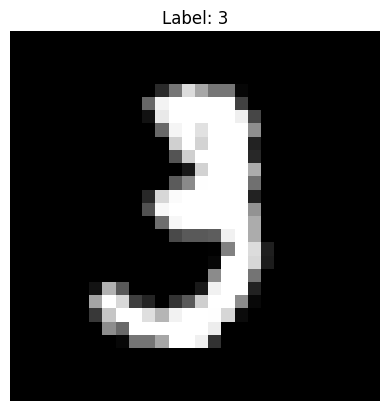

In [3]:
# print the 10th image
plt.imshow(X_train[10], cmap='gray')
plt.title(f"Label: {Y_train[10]}")
plt.axis('off')
plt.show()



In [4]:
# print 10 th image shape
print("Image shape:", X_train[10].shape)

Image shape: (28, 28)


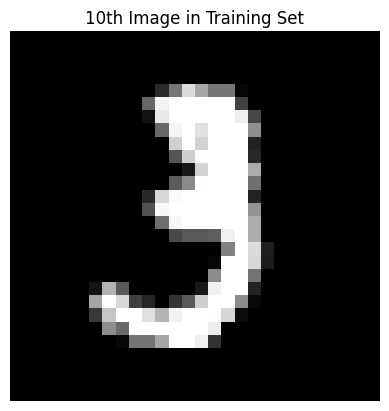

Label for the 10th image: 3


In [5]:
# displaying the image
plt.imshow(X_train[10], cmap='gray')
plt.title("10th Image in Training Set")
plt.axis('off')
plt.show()

# print the corresponding label
print("Label for the 10th image:", Y_train[10])

Image Lables


In [6]:
print(Y_train.shape, Y_test.shape)

(60000,) (10000,)


In [7]:
# unique values in Y_train
print(np.unique(Y_train))

# unique values in Y_test
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


We can use these labels as such or we can also apply One Hot Encoding


All the images have the same dimensions in this dataset, If not, we have to resize all the images to a common dimension


In [8]:
# scaling the values

X_train = X_train/255
X_test = X_test/255

In [9]:
# printing the 10th image

print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building the Neural Network


In [10]:
# setting up the layers of the Neural  Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Input layer: Flatten 28x28 to 784
    keras.layers.Dense(128, activation='relu'),  # Hidden layer: 128 neurons, ReLU
    keras.layers.Dense(10, activation='softmax')  # Output layer: 10 classes
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
# compiling the Neural Network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [12]:
# training the Neural Network
history = model.fit(X_train, Y_train, validation_split=0.1, epochs=5, verbose=2)



Epoch 1/5
1688/1688 - 7s - 4ms/step - accuracy: 0.9233 - loss: 0.2720 - val_accuracy: 0.9647 - val_loss: 0.1270
Epoch 2/5
1688/1688 - 7s - 4ms/step - accuracy: 0.9654 - loss: 0.1189 - val_accuracy: 0.9728 - val_loss: 0.0940
Epoch 3/5
1688/1688 - 10s - 6ms/step - accuracy: 0.9761 - loss: 0.0809 - val_accuracy: 0.9762 - val_loss: 0.0852
Epoch 4/5
1688/1688 - 6s - 4ms/step - accuracy: 0.9826 - loss: 0.0595 - val_accuracy: 0.9755 - val_loss: 0.0855
Epoch 5/5
1688/1688 - 11s - 6ms/step - accuracy: 0.9875 - loss: 0.0440 - val_accuracy: 0.9763 - val_loss: 0.0839


Training data accuracy = Your Accuracy Here


In [13]:
train_loss, train_accuracy = model.evaluate(X_train, Y_train)
print(f"Training data accuracy = {train_accuracy:.4f}")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9890 - loss: 0.0360
Training data accuracy = 0.9878


**Accuracy on Test data:**


In [14]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f"Test data accuracy = {test_accuracy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9732 - loss: 0.0875
Test data accuracy = 0.9757


Test data accuracy = Write Accuracy Here


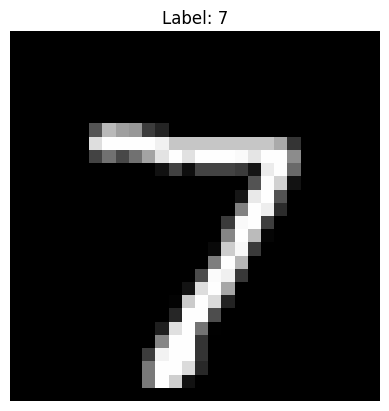

In [15]:
# first data point in X_test
# Display the first image in X_test
plt.imshow(X_test[0], cmap='gray')
plt.title(f"Label: {Y_test[0]}")
plt.axis('off')
plt.show()



In [16]:
print(Y_test[0])

7


In [17]:
#predict for X_test
single_prediction = model.predict(np.expand_dims(X_test[0], axis=0))  # shape = (1, 28, 28)
predicted_label = np.argmax(single_prediction)
print("Predicted label for X_test[0]:", predicted_label)
print("Actual label:", Y_test[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
Predicted label for X_test[0]: 7
Actual label: 7


In [18]:
all_predictions = model.predict(X_test)  # shape = (10000, 10)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


model.predict() gives the prediction probability of each class for that data point


In [19]:
# convert the prediction probabilities to class label
predicted_labels = np.argmax(all_predictions, axis=1)

# Optional: Print first 10 predictions and their actual values
print("Predicted labels:", predicted_labels[:10])
print("Actual labels:   ", Y_test[:10])


Predicted labels: [7 2 1 0 4 1 4 9 6 9]
Actual labels:    [7 2 1 0 4 1 4 9 5 9]


In [20]:
# convert the prediction probabilities to class label for all test data points
# Predict probabilities for all test data points
all_predictions = model.predict(X_test)

# Convert probabilities to class labels
predicted_labels = np.argmax(all_predictions, axis=1)

# Optional: Check first few predicted vs. actual labels
print("Predicted labels:", predicted_labels[:10])
print("Actual labels:   ", Y_test[:10])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted labels: [7 2 1 0 4 1 4 9 6 9]
Actual labels:    [7 2 1 0 4 1 4 9 5 9]


Y_test --> True labels

Y_pred_labels --> Predicted Labels


Confusin Matrix


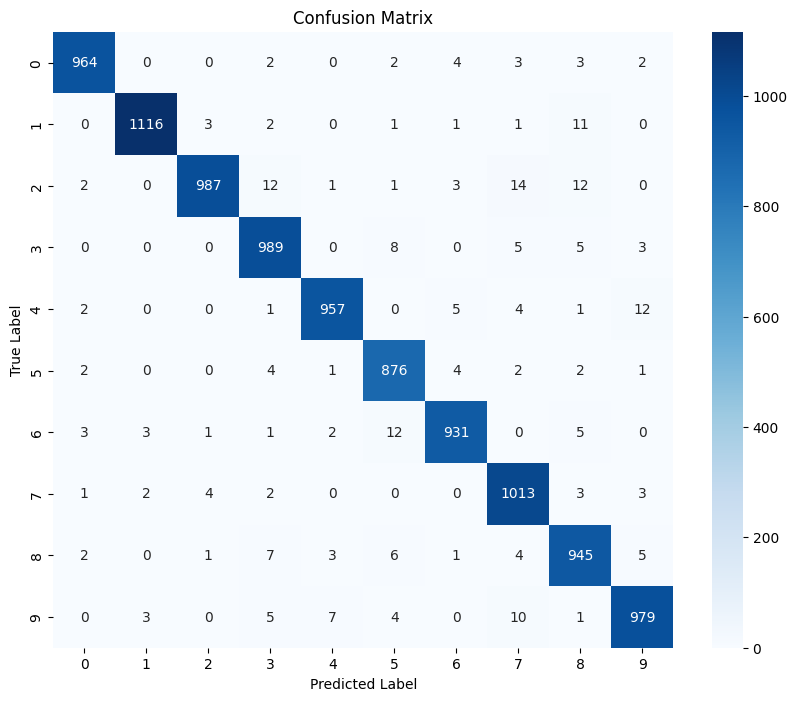

In [21]:
# Plot the confusion matrix between Y_test and Y_pred
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate confusion matrix
cm = confusion_matrix(Y_test, predicted_labels)

# Plot it
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [22]:
from google.colab import files
uploaded = files.upload()


Saving digit01.png to digit01.png


Building a Predictive System


In [25]:
input_image_path = 'digit.png'
input_image = cv2.imread(input_image_path)
print(type(input_image))


<class 'NoneType'>


In [26]:
print(input_image)

None


Saving digit01.png to digit01 (3).png
✅ Image loaded successfully.


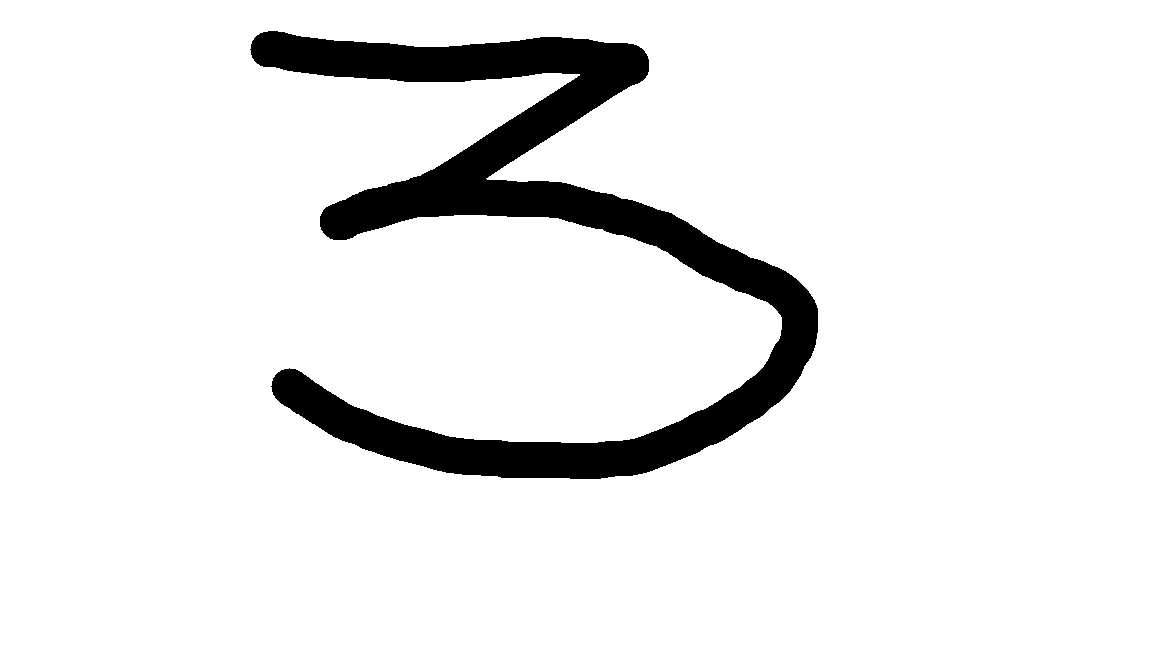

In [30]:
from google.colab import files
uploaded = files.upload()  # Upload your image (e.g., digit.png)

import cv2
from google.colab.patches import cv2_imshow

input_image_path = 'digit01.png'  # Use the exact filename from upload
input_image = cv2.imread(input_image_path)

if input_image is None:
    print("❌ Failed to load image. Check filename or re-upload.")
else:
    print("✅ Image loaded successfully.")
    cv2_imshow(input_image)  # This line shows the image


In [31]:
import os
print(os.listdir())


['.config', 'digit01 (2).png', 'digit01.png', 'digit01 (3).png', 'digit01 (1).png', 'sample_data']


In [32]:
input_image.shape

(648, 1152, 3)

In [33]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [34]:
grayscale.shape

(648, 1152)

In [35]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [36]:
input_image_resize.shape

(28, 28)

In [37]:
cv2_imshow(input_image_resize)

In [38]:
input_image_resize = input_image_resize/255

In [39]:
type(input_image_resize)

numpy.ndarray

In [40]:
image_reshaped = np.reshape(input_image_resize, [1,28,28])

In [41]:
import numpy as np


In [42]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
[[1.7432860e-26 1.7135665e-30 3.1815602e-20 9.9999511e-01 2.8509545e-34
  4.8383608e-06 5.0386972e-24 3.8316875e-17 3.2044643e-17 9.1944376e-18]]


In [43]:
input_pred_label = np.argmax(input_prediction)

In [44]:
print(input_pred_label)

3


**Predictive System**


Path of the image to be predicted: digit01.png


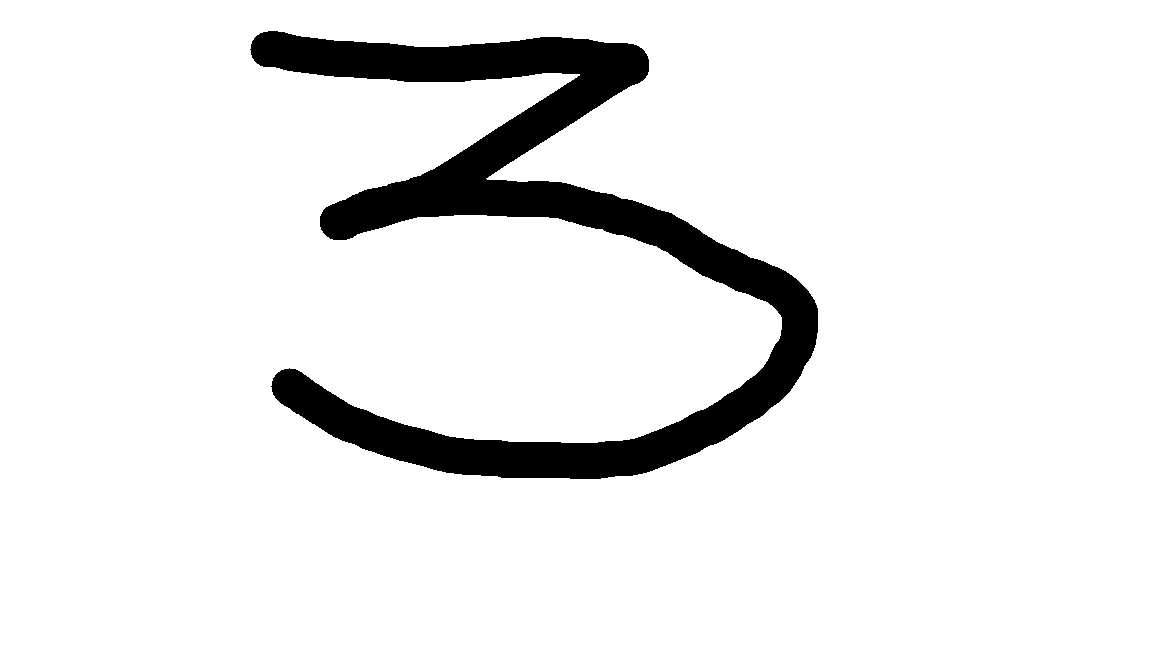

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
The Handwritten Digit is recognised as  3


In [45]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)

In [ ]:
import numpy as np
import cv2
from tensorflow import keras
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

def predict_digit_from_file(image_path, model):
    # Load the image and convert to grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Invert (make digit white, background black)
    image = cv2.bitwise_not(image)

    # Threshold to binary
    _, thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Find contours and get bounding box of the digit
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if contours:
        x, y, w, h = cv2.boundingRect(contours[0])
        digit = thresh[y:y+h, x:x+w]
    else:
        digit = thresh  # fallback

    # Resize to fit into 20x20 box
    digit_resized = cv2.resize(digit, (20, 20), interpolation=cv2.INTER_AREA)

    # Pad to get 28x28
    padded = np.pad(digit_resized, ((4, 4), (4, 4)), 'constant', constant_values=0)

    # Normalize and reshape for model
    normalized = padded / 255.0
    reshaped = normalized.reshape(1, 28, 28)

    # Predict
    prediction = model.predict(reshaped)
    predicted_digit = np.argmax(prediction)

    # Display
    plt.imshow(padded, cmap='gray')
    plt.title(f"Predicted Digit: {predicted_digit}")
    plt.axis('off')
    plt.show()

    print("✅ The Handwritten Digit is recognised as:", predicted_digit)
    return predicted_digit


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


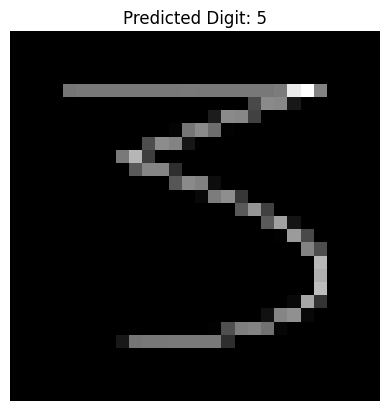

✅ The Handwritten Digit is recognised as: 5


np.int64(5)

In [ ]:
predict_digit_from_file('digit.png', model)
